In [137]:
library(readr)
library(lattice)
library(ggplot2)

# Bad habits and HD

In [197]:
habits <- read_csv("habits.csv")
head(habits)
nrow(habits)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  HasHeartDisease = col_double(),
  Smoking_status = col_double(),
  Smoked100cigs = col_double(),
  Cigs_day = col_double(),
  Avg_drinks_day = col_double(),
  VigorousWorkActivity = col_double(),
  Sleeping_Hours = col_double(),
  Sleeping_problems = col_double(),
  Sleeping_disorder = col_double()
)




X1,HasHeartDisease,Smoking_status,Smoked100cigs,Cigs_day,Avg_drinks_day,VigorousWorkActivity,Sleeping_Hours,Sleeping_problems,Sleeping_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,NA,2,NA,5,2,6,2,2
1,0,NA,2,NA,4,2,6,2,2
2,0,3,1,NA,4,2,8,2,2
3,0,NA,2,NA,1,2,8,2,2
4,0,NA,2,NA,5,2,6,2,2
5,0,3,1,NA,2,2,7,1,2


[1] 3310

In [198]:
habits$Cigs_day[is.na(habits$Cigs_day)] <- 100
habits$Cigs_day[habits$Smoking_status==3] <- 0
habits <- habits[!(habits$Cigs_day==100),]
habits$Smoking_status[habits$Smoking_status==3] = 0
habits$Smoking_status[habits$Smoking_status==1|habits$Smoking_status==2] = 1
habits$HasHeartDisease[habits$HasHeartDisease==0] <- 'Does not have'
habits$HasHeartDisease[habits$HasHeartDisease==1] <- 'Has'
habits <- na.omit(habits)
head(habits)
nrow(habits)

X1,HasHeartDisease,Smoking_status,Smoked100cigs,Cigs_day,Avg_drinks_day,VigorousWorkActivity,Sleeping_Hours,Sleeping_problems,Sleeping_disorder
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Does not have,0,1,0,4,2,8,2,2
5,Does not have,0,1,0,2,2,7,1,2
7,Does not have,1,1,10,1,2,7,1,2
8,Does not have,1,1,1,5,1,5,2,2
9,Does not have,0,1,0,2,1,7,1,2
10,Does not have,1,1,12,8,2,8,2,2


[1] 1732

### Smoking

In [246]:
habits <- habits[!(habits$Cigs_day>40),]
habits_sm <- habits[habits$Smoking_status==1, ]
habits_nonsm <- habits[habits$Smoking_status==0, ]
nrow(habits_sm)
nrow(habits_nonsm)
unique(habits_nonsm$Smoked100cigs)

[1] 877

[1] 844

[1] 1

#### Cigs per day (smokers)

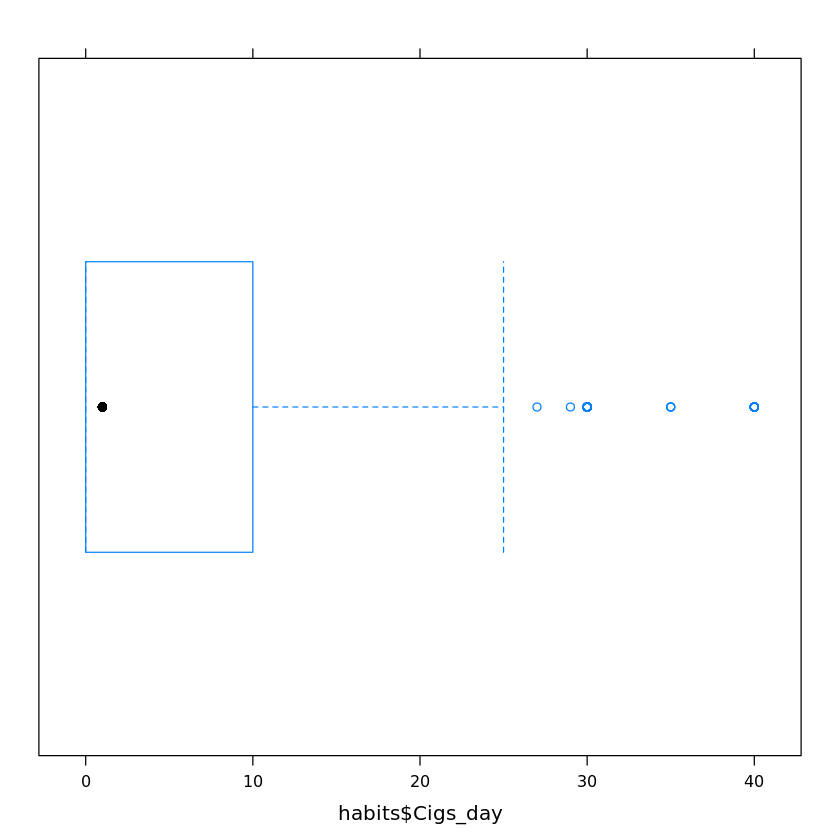

In [247]:
bwplot(habits$Cigs_day)

In [248]:
aggregate(Cigs_day~HasHeartDisease, data=habits_sm, mean)

HasHeartDisease,Cigs_day
<chr>,<dbl>
Does not have,12.39323
Has,13.10000


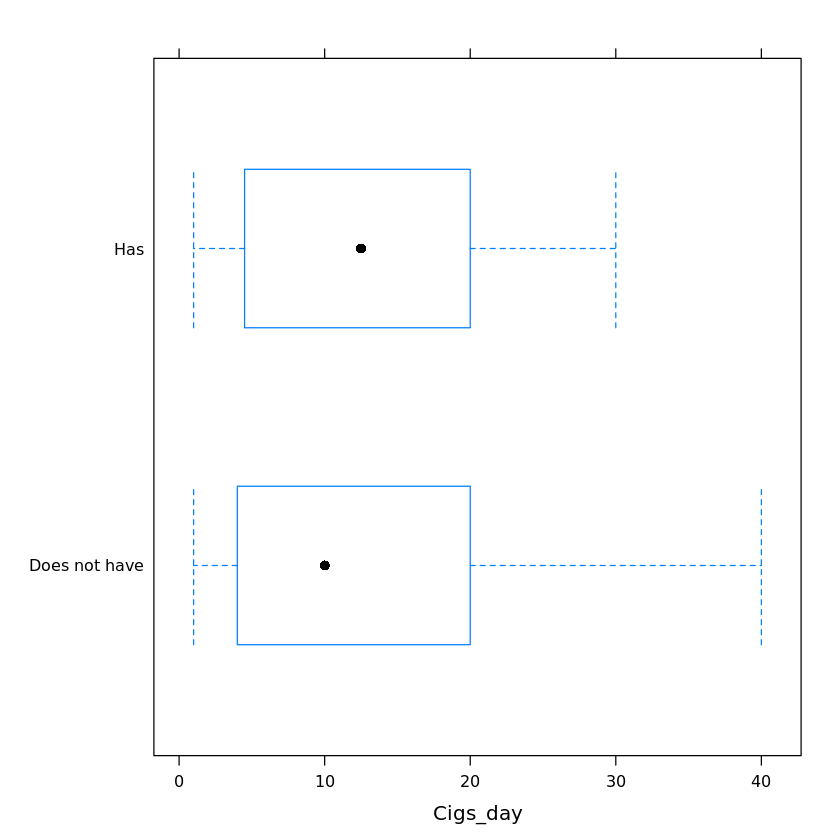

In [249]:
bwplot(HasHeartDisease ~ Cigs_day, data = habits_sm)

In [252]:
t.test(Cigs_day ~ HasHeartDisease, data=habits_sm, alternative="less", conf.level=0.9)


	Welch Two Sample t-test

data:  Cigs_day by HasHeartDisease
t = -0.35054, df = 20.049, p-value = 0.3648
alternative hypothesis: true difference in means is less than 0
90 percent confidence interval:
     -Inf 1.965201
sample estimates:
mean in group Does not have           mean in group Has 
                   12.39323                    13.10000 


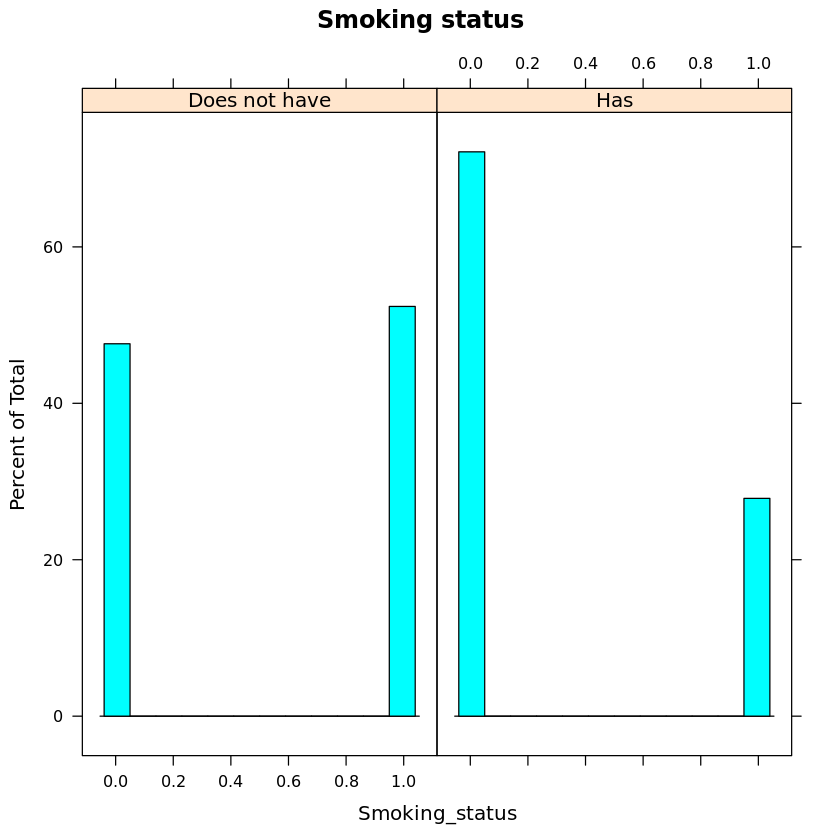

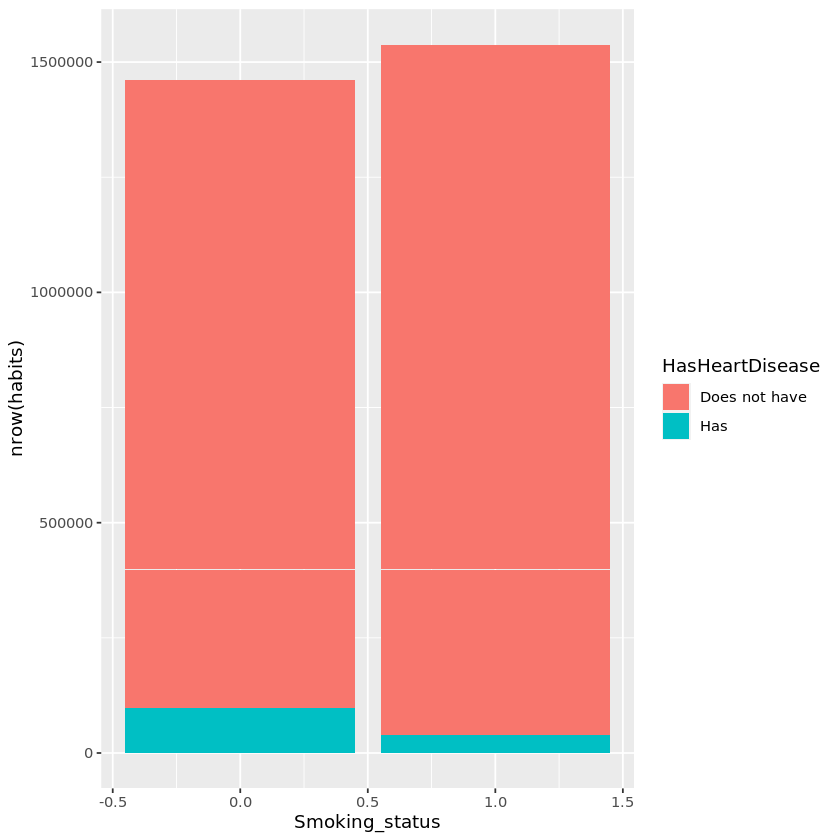

In [201]:
# hist(habits_sm$HasHeartDisease, breaks=30 , xlim=c(0,300) , col=rgb(1,0,0,0.5) , xlab="smokers" , ylab="nbr of plants" , main="" )
# hist(habits_nonsm$HasHeartDisease, breaks=30 , xlim=c(0,300) , col=rgb(0,0,1,0.5) , xlab="non-smokers" , ylab="" , main="")
histogram(~ Smoking_status|HasHeartDisease, data = habits, main="Smoking status")
# ggplot(habits, aes(fill=HasHeartDisease, y=Cigs_day, x=HasHeartDisease )) + 
#     geom_bar(position="dodge", stat="identity")
ggplot(habits, aes(fill= HasHeartDisease, y=nrow(habits), x=Smoking_status)) + 
    geom_bar(position="stack", stat="identity")

### Alcohol

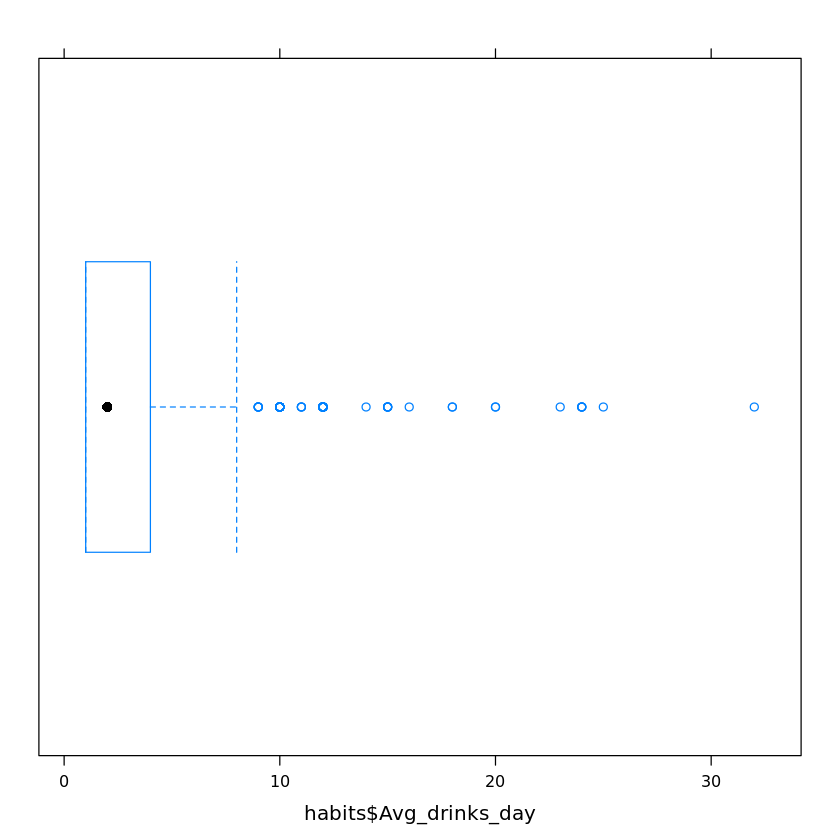

In [117]:
habits <- habits[!(habits$Avg_drinks_day>200),]
bwplot(habits$Avg_drinks_day)

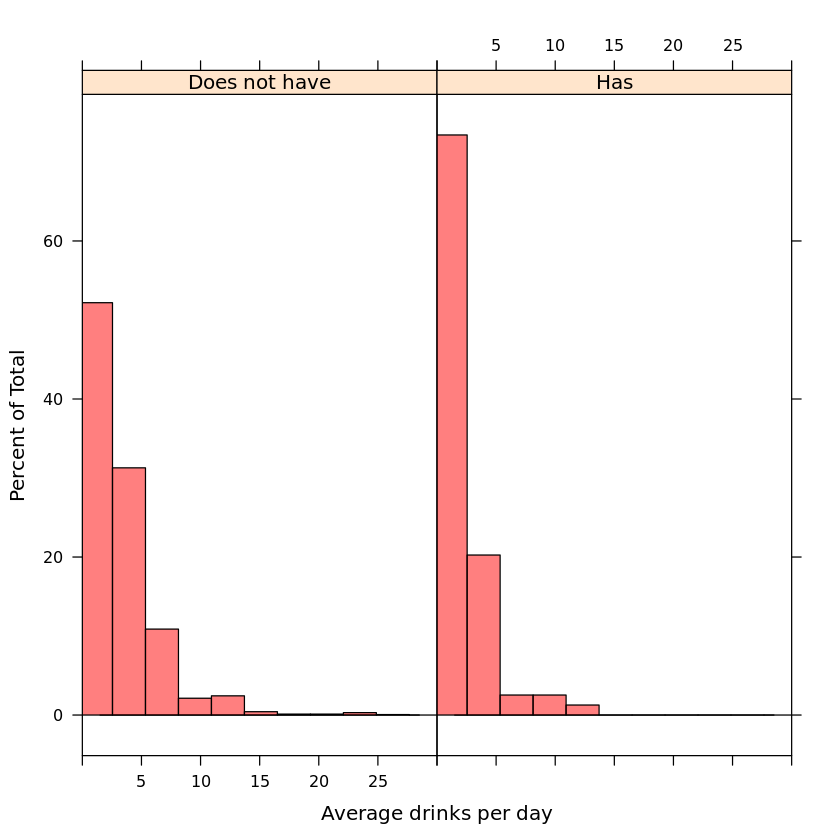

In [118]:
histogram(~ Avg_drinks_day|HasHeartDisease, data = habits, xlim=c(0,30) , col=rgb(1,0,0,0.5) , xlab="Average drinks per day" , main="")
# hist(Ixos, breaks=30 , xlim=c(0,300) , col=rgb(1,0,0,0.5) , xlab="height" , ylab="nbr of plants" , main="" )
# hist(Primadur, breaks=30 , xlim=c(0,300) , col=rgb(0,0,1,0.5) , xlab="height" , ylab="" , main="")

### Sleeping 

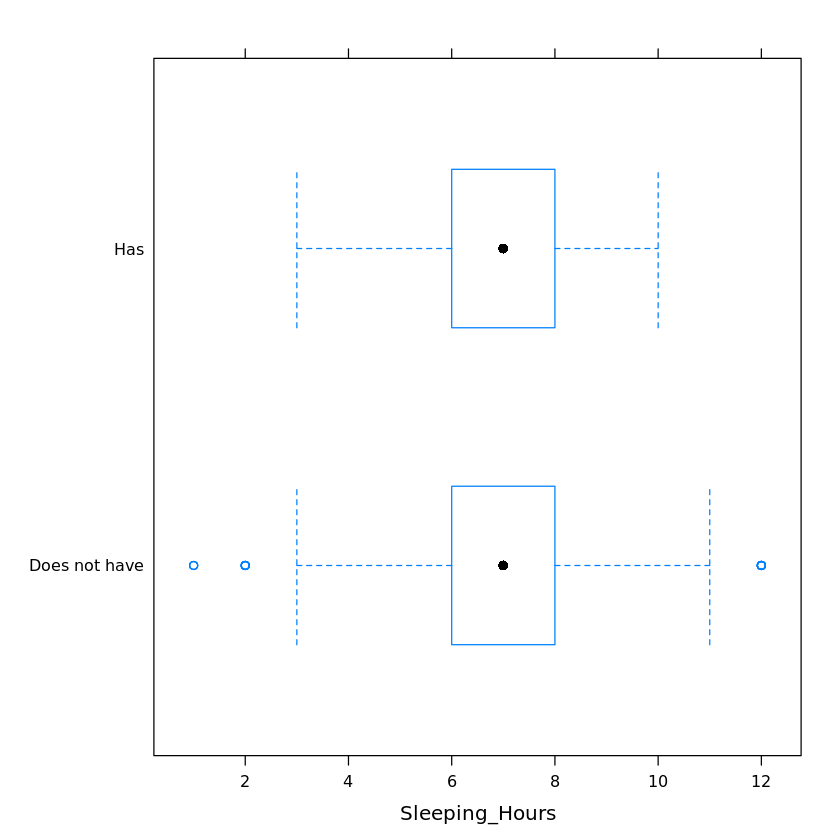

In [141]:
habits <- habits[!(habits$Sleeping_Hours>40),]
# bwplot(habits$Sleeping_Hours)
# hist(habits$Sleeping_Hours, main='How many hours do people sleep')
bwplot(HasHeartDisease ~ Sleeping_Hours, data = habits)


#### Sleeping problems and Sleeping disorder

In [123]:
habits <- habits[!(habits$Sleeping_problems>3),]
habits$Sleeping_problems[habits$Sleeping_problems==1] <- 1
habits$Sleeping_problems[habits$Sleeping_problems==2] <- 0

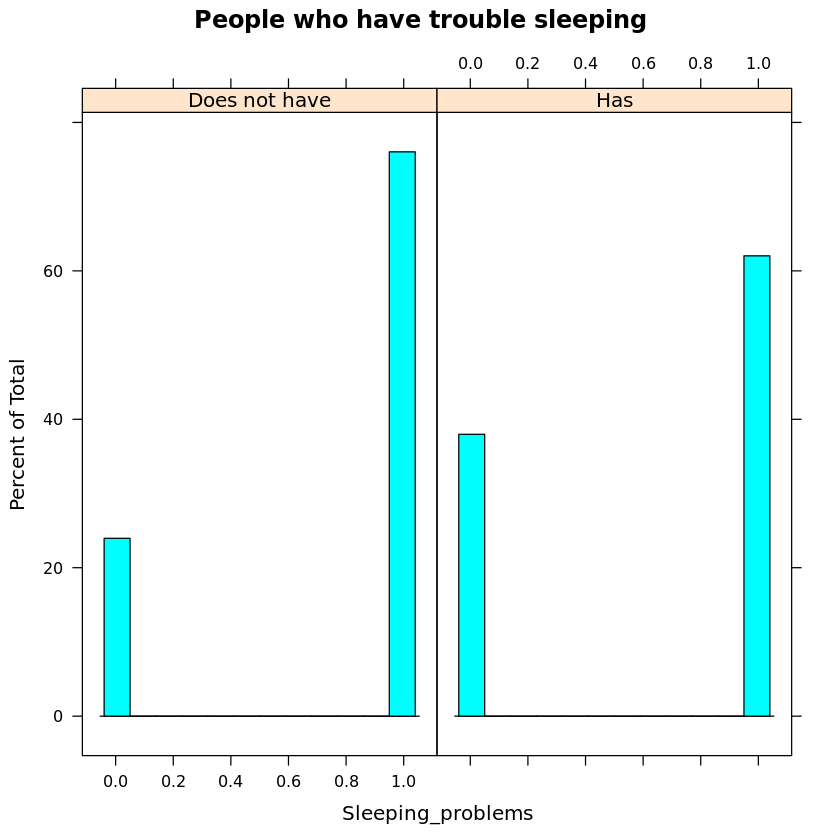

In [126]:
histogram(~ Sleeping_problems|HasHeartDisease, data = habits, main = "People who have trouble sleeping")

In [125]:
habits <- habits[!(habits$Sleeping_disorder>3),]
habits$Sleeping_disorder[habits$Sleeping_disorder==1] <- 1
habits$Sleeping_disorder[habits$Sleeping_disorder==2] <- 0

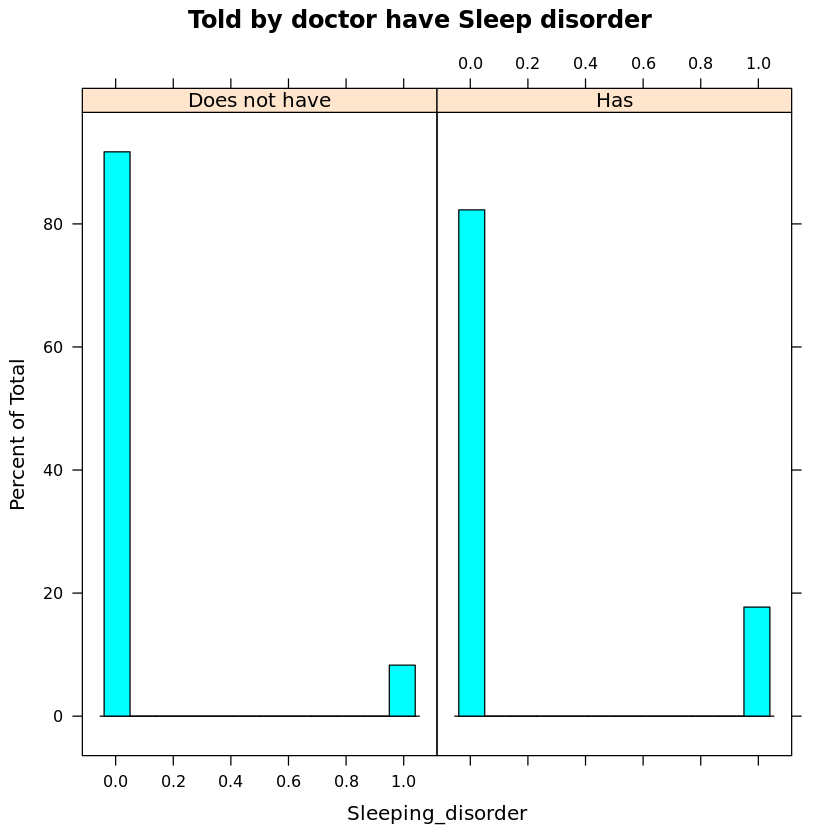

In [127]:
histogram(~ Sleeping_disorder|HasHeartDisease, data = habits, main = "Told by doctor have Sleep disorder")

### Physical Activity

In [142]:
habits <- habits[!(habits$VigorousWorkActivity >3),]
habits$VigorousWorkActivity [habits$VigorousWorkActivity ==1] <- 1
habits$VigorousWorkActivity [habits$VigorousWorkActivity ==2] <- 0

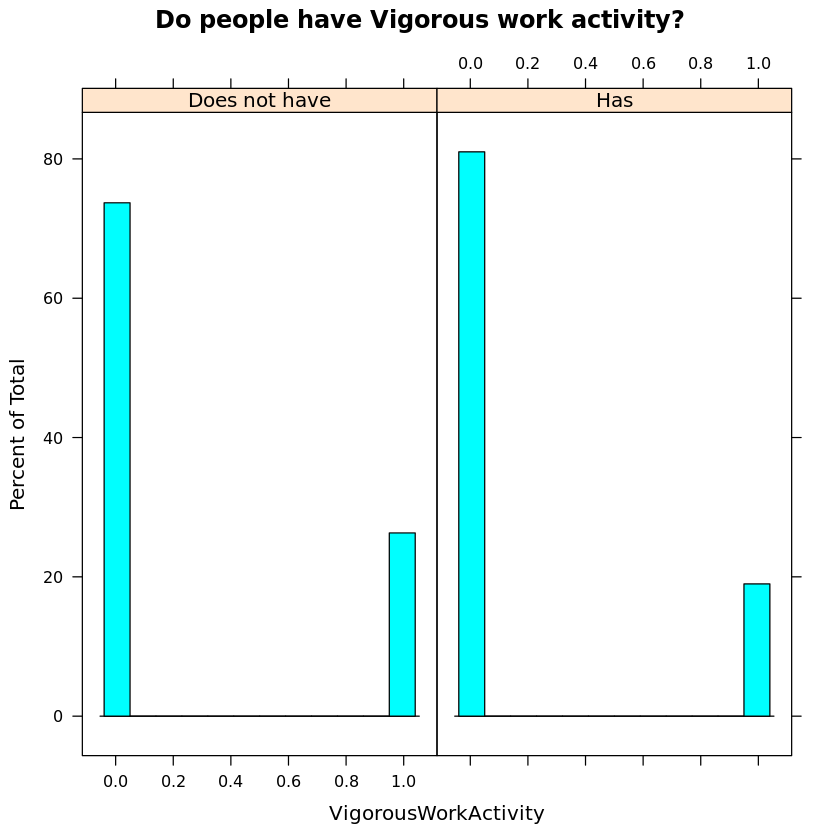

In [144]:
histogram(~ VigorousWorkActivity|HasHeartDisease, data = habits, main = "Do people have Vigorous work activity?")

### Do people with HD have move healthy lifestyle?

In [173]:
vec = c()
for (i in 1:nrow(habits)){
    if(habits[i,3]==1 && habits[i,6]>=1 && habits[i,7]==0 ) {
        vec[i] <- 'Unhealthy lifestyle'
    } else {
        vec[i] <- 'Healthy lifestyle'
    }
}
habits$lifestyle <- vec   
head(habits)

X1,HasHeartDisease,Smoking_status,Smoked100cigs,Cigs_day,Avg_drinks_day,VigorousWorkActivity,Sleeping_Hours,Sleeping_problems,Sleeping_disorder,lifestyle
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,Does not have,0,1,0,4,0,8,2,2,Healthy lifestyle
5,Does not have,0,1,0,2,0,7,1,2,Healthy lifestyle
7,Does not have,1,1,10,1,0,7,1,2,Unhealthy lifestyle
8,Does not have,1,1,1,5,1,5,2,2,Healthy lifestyle
9,Does not have,0,1,0,2,1,7,1,2,Healthy lifestyle
10,Does not have,1,1,12,8,0,8,2,2,Unhealthy lifestyle


In [174]:
table(habits$lifestyle, habits$HasHeartDisease)

                     
                      Does not have  Has
  Healthy lifestyle            1058   60
  Unhealthy lifestyle           592   19

#### Hypothesis testing:
H0: Lifestyle of people doen't depend on whether or not they have HD

H1: People with HD tend to have healthier lifestyle

In [177]:
prop.test(x=c(60,1058), n=c(79,1650), correct=FALSE, conf.level = 0.9, alternative = 'greater')


	2-sample test for equality of proportions without continuity
	correction

data:  c(60, 1058) out of c(79, 1650)
X-squared = 4.6159, df = 1, p-value = 0.01584
alternative hypothesis: greater
90 percent confidence interval:
 0.05482701 1.00000000
sample estimates:
   prop 1    prop 2 
0.7594937 0.6412121 


# Demographics data 

In [191]:
demo <- read_csv("demographics.csv")
demo$HasHeartDisease[demo$HasHeartDisease==0] <- 'Does not have'
demo$HasHeartDisease[demo$HasHeartDisease==1] <- 'Has'
demo$Gender [demo$Gender ==1] <- 'Male'
demo$Gender [demo$Gender ==2] <- 'Female'
head(demo)
nrow(demo)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  HasHeartDisease = col_double(),
  Age = col_double(),
  `Served in army` = col_double(),
  Gender = col_double(),
  Сohabitants_number = col_double()
)




X1,HasHeartDisease,Age,Served in army,Gender,Сohabitants_number
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
0,Does not have,62,2,Female,2
1,Does not have,71,1,Male,2
2,Does not have,52,2,Male,5
3,Does not have,21,2,Male,4
4,Does not have,64,2,Male,6
5,Does not have,66,1,Male,3


[1] 5906

### Age

HasHeartDisease,Age
<chr>,<dbl>
Does not have,49.90678
Has,68.05138


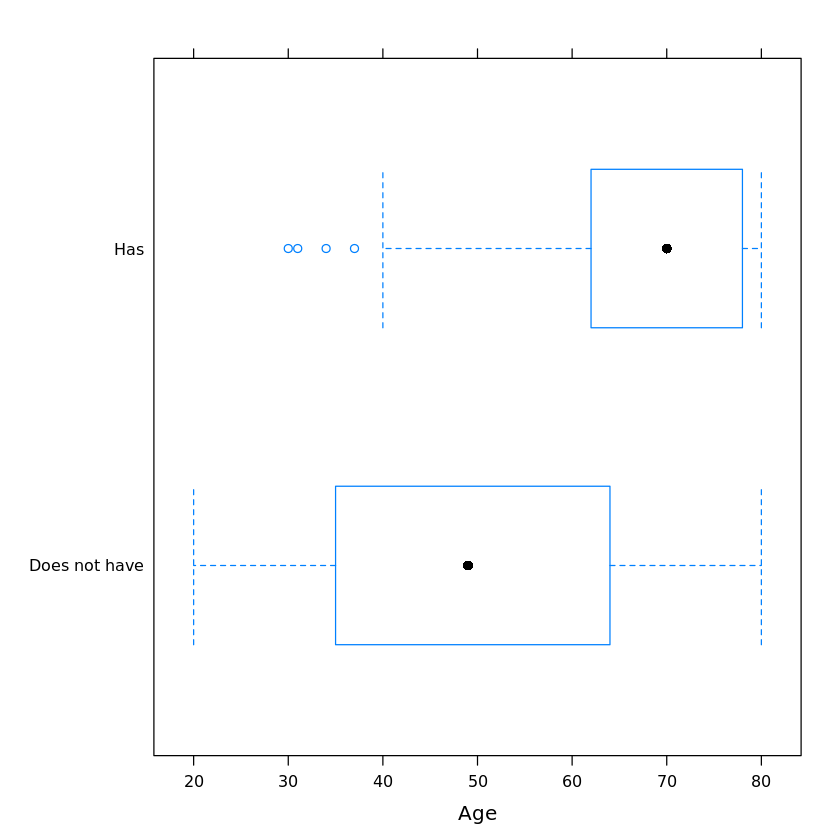

In [187]:
aggregate(Age~HasHeartDisease, data=demo, mean)
bwplot(HasHeartDisease ~ Age, data = demo)

#### Proportion test (testing if people older than 65 y.o. are more likely to have Heart Disease)

In [188]:
demo1 <- demo[complete.cases(demo), ]
demo1$Age[demo1$Age>=65] <- 'Older'
demo1$Age[demo1$Age<65] <- 'Younger'

In [189]:
table(demo1$Age, demo1$HasHeartDisease)

         
          Does not have  Has
  Older            1376  159
  Younger          4277   94

In [190]:
prop.test(x=c(159,94), n=c(1535,4371), correct=FALSE, conf.level = 0.9, alternative = 'greater')


	2-sample test for equality of proportions without continuity
	correction

data:  c(159, 94) out of c(1535, 4371)
X-squared = 186.65, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
90 percent confidence interval:
 0.07172126 1.00000000
sample estimates:
    prop 1     prop 2 
0.10358306 0.02150538 


## Gender

In [192]:
table(demo$Gender, demo$HasHeartDisease)

        
         Does not have  Has
  Female          2934   82
  Male            2719  171

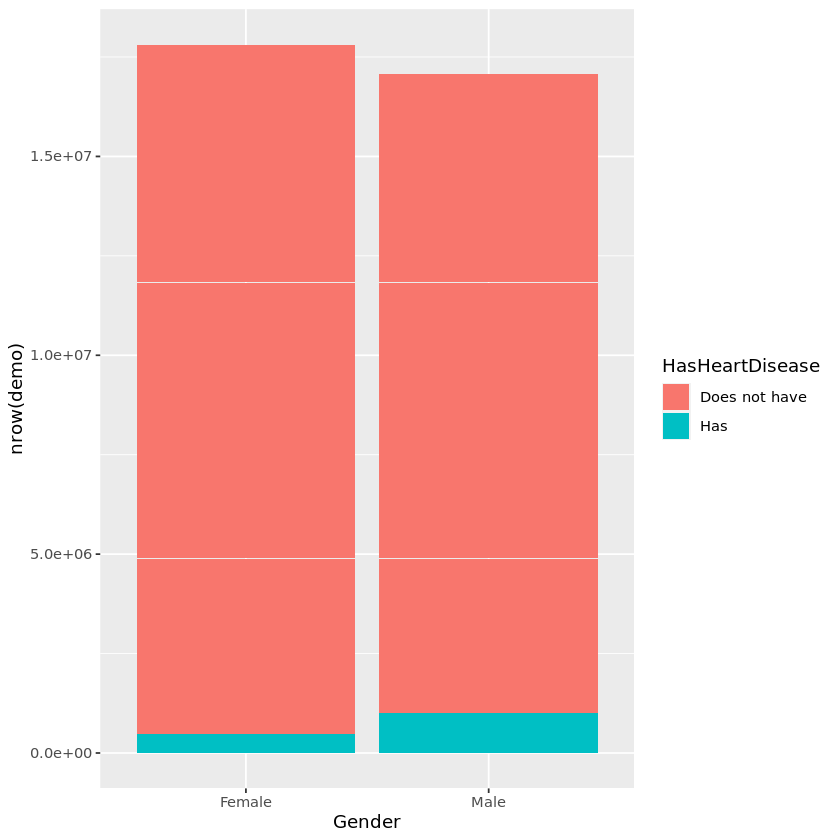

In [194]:
ggplot(demo, aes(fill=HasHeartDisease, y=nrow(demo), x=Gender)) + 
    geom_bar(position="stack", stat="identity")

### Serving in army

In [222]:
demo <- demo[!(demo$`Served in army` >3),]
demo$`Served in army` [demo$`Served in army` ==1] <- 1
demo$`Served in army` [demo$`Served in army` ==2] <- 0
nrow(demo)

[1] 5905

In [206]:
table(demo$Gender, demo$`Served in army`)

        
            0    1
  Female 2973   42
  Male   2179  711

In [207]:
male_demo <- demo[demo$Gender == 'Male',]

In [211]:
table(male_demo$`Served in army`, male_demo$HasHeartDisease)

   
    Does not have  Has
  0          2103   76
  1           616   95

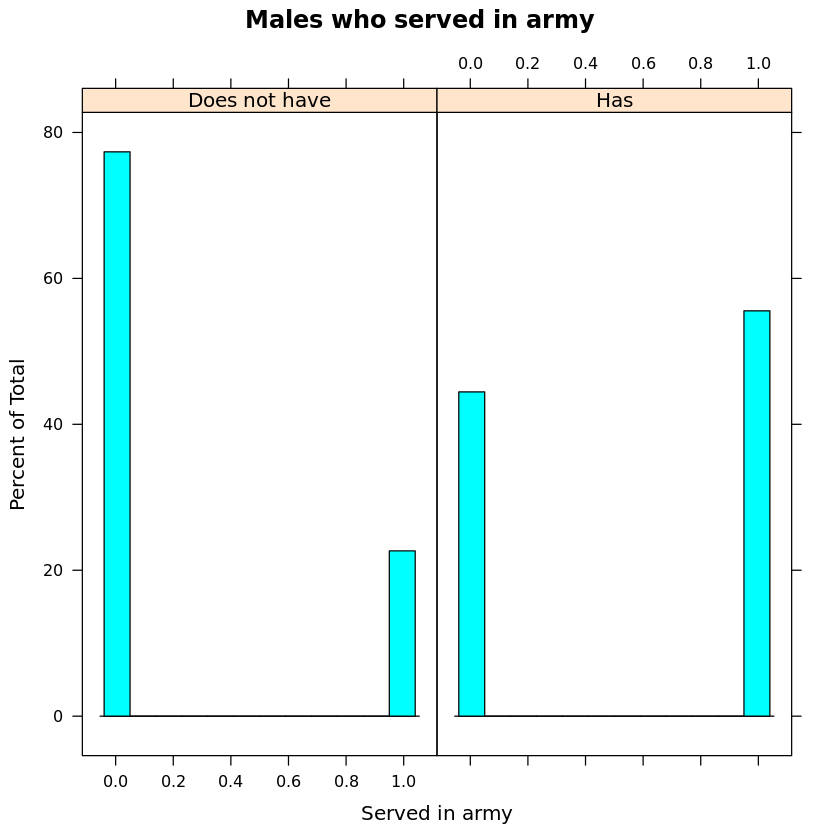

In [209]:
histogram(~ `Served in army`|HasHeartDisease, data = male_demo, main = "Males who served in army")

#### Are males who served in army more likely to have heart disease?

In [212]:
prop.test(x=c(95,76), n=c(711,2179), correct=FALSE, conf.level = 0.9, alternative = 'greater')


	2-sample test for equality of proportions without continuity
	correction

data:  c(95, 76) out of c(711, 2179)
X-squared = 93.88, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
90 percent confidence interval:
 0.08162555 1.00000000
sample estimates:
    prop 1     prop 2 
0.13361463 0.03487838 


### Number of cohabitants

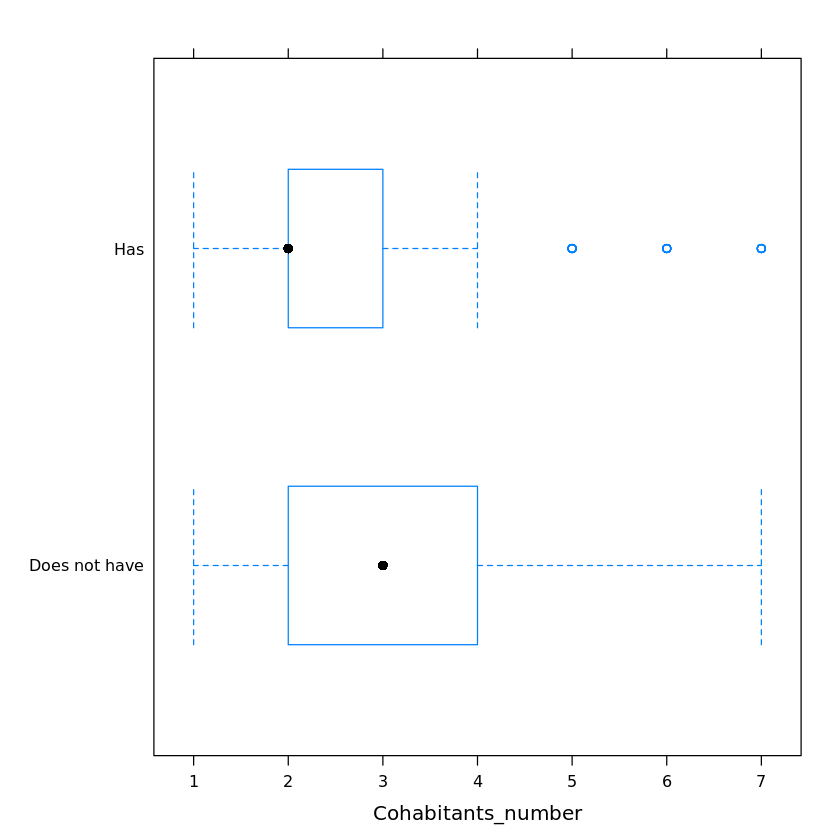

In [217]:
bwplot(HasHeartDisease ~ Сohabitants_number, data = demo)

#### does this number depend on Age? lets get rid of age factor

In [227]:
same_age <- demo[demo$Age>=35 & demo$Age<=55, ]
nrow(same_age)

[1] 2076

In [228]:
aggregate(Сohabitants_number~HasHeartDisease, data=same_age, mean)

HasHeartDisease,Сohabitants_number
<chr>,<dbl>
Does not have,3.551539
Has,3.310345


#### hypothesis testing: whether or not the number of cohabitants has correlation with HD

In [230]:
t.test(Сohabitants_number ~ HasHeartDisease, data=same_age, alternative="greater", conf.level=0.9)


	Welch Two Sample t-test

data:  Сohabitants_number by HasHeartDisease
t = 0.73577, df = 28.688, p-value = 0.2339
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 -0.188821       Inf
sample estimates:
mean in group Does not have           mean in group Has 
                   3.551539                    3.310345 
